# Analysis of Auto Dataset

This notebook performs an analysis on the Auto dataset. The steps include:

1. Loading the dataset.
2. Converting relevant columns to numeric types.
3. Selecting numeric columns for analysis.
4. Calculating the Pearson correlation matrix.
5. Identifying highly correlated feature pairs with a Pearson correlation above a specified threshold.

/home/ben/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


First rows of the numeric columns:
    mpg  cylinders  displacement  horsepower  weight
0   NaN        NaN           NaN         NaN     NaN
1  21.0        6.0         160.0       110.0   2.620
2  21.0        6.0         160.0       110.0   2.875
3  22.8        4.0         108.0        93.0   2.320
4  21.4        6.0         258.0       110.0   3.215
Pearson correlation matrix:
                   mpg  cylinders  displacement  horsepower    weight
mpg           1.000000  -0.852162     -0.847551   -0.776168 -0.867659
cylinders    -0.852162   1.000000      0.902033    0.832447  0.782496
displacement -0.847551   0.902033      1.000000    0.790949  0.887980
horsepower   -0.776168   0.832447      0.790949    1.000000  0.658748
weight       -0.867659   0.782496      0.887980    0.658748  1.000000
Highly correlated feature pairs with Pearson correlation above the threshold:
              cylinders  displacement  horsepower    weight
cylinders           NaN      0.902033    0.832447  0.782496
d

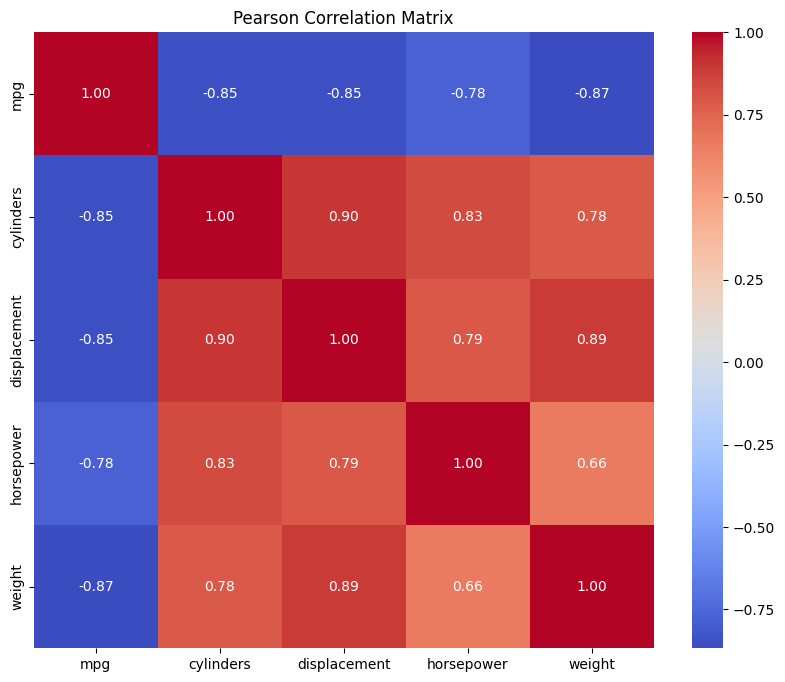

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv(
    '/home/ben/tulips/flip00-develop/flip00-develop/Data/Data1/Auto.csv',
    header=None,
    names=['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight'],
    engine='python'
)

# Convert relevant columns to numeric types
data['mpg'] = pd.to_numeric(data['mpg'], errors='coerce')
data['cylinders'] = pd.to_numeric(data['cylinders'], errors='coerce')
data['displacement'] = pd.to_numeric(data['displacement'], errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

# Select numeric columns
numeric_data = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']]

# Print the first rows of the numeric columns
print("First rows of the numeric columns:")
print(numeric_data.head())

# Calculate the Pearson correlation matrix
correlation_matrix = numeric_data.corr()

print("Pearson correlation matrix:")
print(correlation_matrix)

# Define a threshold for high correlation
threshold = 0.5  # Adjusted threshold to 0.5 for demonstration

# Find feature pairs with correlation above the threshold
highly_correlated_pairs = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1.0)]

# Drop NaN values
highly_correlated_pairs = highly_correlated_pairs.dropna(how='all', axis=0).dropna(how='all', axis=1)

if not highly_correlated_pairs.empty:
    print("Highly correlated feature pairs with Pearson correlation above the threshold:")
    print(highly_correlated_pairs)
else:
    print("No feature pairs with Pearson correlation above the threshold.")

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()